Задание:

Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.

Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.

Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически (один вопрос/гипотеза — один график).

Желательно, но не обязательно:*

Если данные содержат пропуски, заполните их и обоснуйте своё решение. Проверьте, как изменились базовые статистики до и после замены.

In [1]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sal = pd.read_csv('salary_dataset.csv')
sal.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


### Оценка данных по столбцам

In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [4]:
sal.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [5]:
#удаляем неинформативный столбец
df = sal.copy()
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [6]:
#смотрим строки с пустыми значениями
df[df. isna(). any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


In [7]:
print(df["Education Level"].value_counts())

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64


есть желание объединить докторов философии, бакалавров и магистров

In [8]:
df_ = df.copy()
df_["Education Level"] = np.where(df_["Education Level"] == "Bachelor's", "Bachelor's Degree", df_["Education Level"] )
df_["Education Level"] = np.where(df_["Education Level"] == "Master's", "Master's Degree", df_["Education Level"] )
df_["Education Level"] = np.where(df_["Education Level"] == "phD", "PhD", df_["Education Level"] )
df_

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's Degree,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [9]:
df_['Education Level'].value_counts()

Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64

In [10]:
#смотрим строки с нужными  должностями для заполнения средней зарплатой по должности
df_FSE = df_[df_['Job Title'] == 'Full Stack Engineer']
df_FSE

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
1205,27.0,Female,Master's Degree,Full Stack Engineer,3.0,100000.0,UK,Mixed
1208,47.0,Female,PhD,Full Stack Engineer,12.0,175000.0,UK,Mixed
1218,32.0,Male,Bachelor's Degree,Full Stack Engineer,5.0,115000.0,Australia,White
1222,42.0,Male,PhD,Full Stack Engineer,14.0,180000.0,China,White
1229,36.0,Female,Master's Degree,Full Stack Engineer,8.0,140000.0,China,Korean
...,...,...,...,...,...,...,...,...
3121,31.0,Female,Master's Degree,Full Stack Engineer,7.0,108799.0,China,White
3125,28.0,Female,Master's Degree,Full Stack Engineer,4.0,82697.0,UK,White
3128,43.0,Male,Bachelor's Degree,Full Stack Engineer,18.0,152560.0,Australia,Australian
3133,29.0,Female,Bachelor's Degree,Full Stack Engineer,6.0,100358.0,Canada,White


In [11]:
print(df_FSE.groupby("Years of Experience")["Salary"].mean())

Years of Experience
1.0      55000.000000
2.0      69032.000000
3.0      89083.000000
4.0      92310.714286
5.0     103430.100000
6.0     114411.012987
7.0     130113.029412
8.0     133079.227273
9.0     134039.352941
10.0    154458.428571
11.0    142159.000000
12.0    165650.666667
13.0    146289.300000
14.0    165468.285714
15.0    171487.750000
17.0    153342.000000
18.0    152560.000000
19.0    174533.111111
20.0    167744.750000
21.0    178428.500000
22.0    180436.333333
23.0    181021.000000
24.0    192756.000000
25.0    182319.800000
27.0    183417.000000
28.0    191239.000000
30.0    121450.000000
33.0    188232.000000
Name: Salary, dtype: float64


In [12]:
#видна прямая зависимость между опытом работу и зарплатой, пропуск заменим средним значением
df_1 = df_.copy()
df_1['Salary'] = df_1['Salary'].fillna(df_FSE.groupby('Years of Experience')['Salary'].transform('mean'))

In [13]:
df_1[df_1. isna(). any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


In [14]:
#второй сотрудник без данных о зарплате
df_SM = df_[df_['Job Title'] == 'Social M']
df_SM

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White


по должности Social M нет статистических данных для определения зарплаты и опыта, строчку удалим из выборки

In [15]:
#третий сотрудник без данных о зарплате
df_SD = df_[df_['Job Title'] == 'Sales Director']
df_SD

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
19,51.0,Male,Bachelor's Degree,Sales Director,22.0,180000.0,Australia,Asian
4879,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0,Australia,White
4883,33.0,Male,PhD,Sales Director,10.0,155000.0,USA,Asian
4892,31.0,Male,Bachelor's Degree,Sales Director,9.0,140000.0,USA,White
4896,33.0,Male,PhD,Sales Director,10.0,155000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6597,33.0,Female,Bachelor's Degree,Sales Director,7.0,90000.0,USA,Asian
6603,30.0,Female,Bachelor's Degree,Sales Director,5.0,70000.0,Canada,Black
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,China,Chinese
6656,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,China,White


In [16]:
print(df_SD.groupby("Years of Experience")["Salary"].mean())

Years of Experience
5.0      70000.000000
6.0      75000.000000
7.0      90000.000000
8.0      80000.000000
9.0     140000.000000
10.0    152105.263158
14.0    140000.000000
18.0    180000.000000
22.0    180000.000000
Name: Salary, dtype: float64


In [17]:
#видна прямая зависимость между опытом работу и зарплатой, пропуск заменим средним значением
df_1['Salary'] = df_1['Salary'].fillna(df_SD.groupby('Years of Experience')['Salary'].transform('mean'))

In [18]:
df_1[df_1. isna(). any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White


In [19]:
#проверка сотрудника с пустым образованием
df_D = df_[df_['Job Title'].str.contains('Developer', na=False)]
df_D

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
10,29.0,Male,Master's Degree,Software Developer,3.0,75000.0,UK,Welsh
27,24.0,Male,Bachelor's Degree,Junior Developer,1.0,40000.0,Australia,Asian
70,33.0,Male,Bachelor's Degree,Web Developer,6.0,65000.0,USA,Hispanic
97,26.0,Male,Bachelor's Degree,Junior Software Developer,1.0,35000.0,China,White
103,33.0,Male,Bachelor's Degree,Junior Web Developer,5.0,50000.0,Canada,Asian
...,...,...,...,...,...,...,...,...
4618,34.0,Male,Master's Degree,Web Developer,8.0,90000.0,Canada,Asian
4621,29.0,Female,Master's Degree,Web Developer,3.0,60000.0,USA,White
4623,26.0,Female,Bachelor's Degree,Web Developer,1.0,35000.0,UK,Mixed
4628,30.0,Male,Bachelor's Degree,Web Developer,4.0,65000.0,China,Korean


In [20]:
print(df_D.groupby("Job Title")["Education Level"].value_counts())


Job Title                  Education Level  
Back end Developer         Bachelor's Degree    145
                           Master's Degree       84
                           High School           15
Front End Developer        Bachelor's Degree     31
Front end Developer        Bachelor's Degree    178
                           Master's Degree       60
                           High School            3
Junior Developer           Bachelor's Degree      1
Junior Software Developer  Bachelor's Degree     58
Junior Web Developer       Bachelor's Degree     37
                           High School            3
                           Master's Degree        2
Senior Software Developer  Master's Degree        3
Software Developer         Bachelor's Degree    118
                           Master's Degree        7
Web Developer              Bachelor's Degree     50
                           Master's Degree       34
                           High School            3
Name: Education Lev

In [21]:
print(df_D.groupby("Education Level")["Job Title"].value_counts())

Education Level    Job Title                
Bachelor's Degree  Front end Developer          178
                   Back end Developer           145
                   Software Developer           118
                   Junior Software Developer     58
                   Web Developer                 50
                   Junior Web Developer          37
                   Front End Developer           31
                   Junior Developer               1
High School        Back end Developer            15
                   Front end Developer            3
                   Junior Web Developer           3
                   Web Developer                  3
Master's Degree    Back end Developer            84
                   Front end Developer           60
                   Web Developer                 34
                   Software Developer             7
                   Senior Software Developer      3
                   Junior Web Developer           2
Name: Job Title, dt

нет возможности точно сказать, какое образование у данного человека, поэтому эту строку тоже удалим

и также удалим две строки, в которых заполнено всего 2 столбца

In [22]:
#строки к удалению
df_1[df_1. isna(). any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
2011,27.0,Male,NaN,Developer,7.0,100000.0,UK,White
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White


In [23]:
df_2 = df_1.dropna (subset=['Education Level', 'Salary'])
df_2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's Degree,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [24]:
df_2.describe()

,Age,Years of Experience,Salary
count,6700.000000,6700.000000,6700.000000
mean,33.622985,8.094851,115325.883019
std,7.614770,6.059441,52784.656947
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [25]:
(df_2.isna().mean() * 100).round(2)

Age                    0.0
Gender                 0.0
Education Level        0.0
Job Title              0.0
Years of Experience    0.0
Salary                 0.0
Country                0.0
Race                   0.0
dtype: float64

пустые значения заполнены и удалены, там где нет возможности заполнить

# Распределение данных

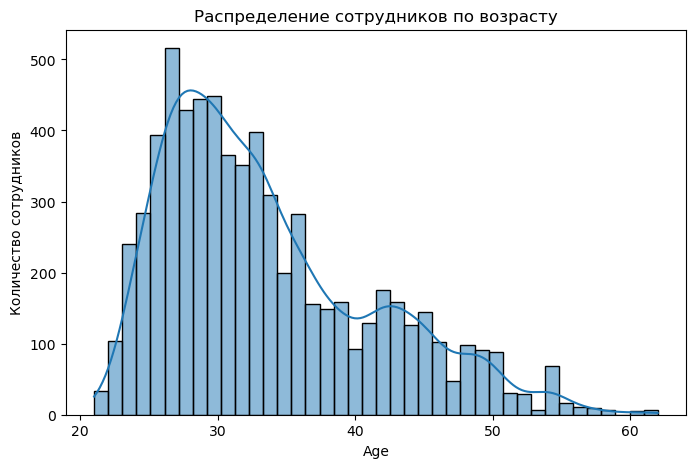

In [26]:
plt.figure(figsize=[8,5])
sns.histplot(data=df_2, x="Age", bins=40, kde=True)
plt.title("Распределение сотрудников по возрасту")
plt.ylabel("Количество сотрудников")
plt.show()

В организации сотрудники по возрасту имеют нормальное распределение, мало очень молодых сотрудников до 25 лет, а также больще 50 лет. Основной возраст 25-36 лет

In [27]:
df_2["Gender"].value_counts(normalize=True)

Male      0.548209
Female    0.449701
Other     0.002090
Name: Gender, dtype: float64

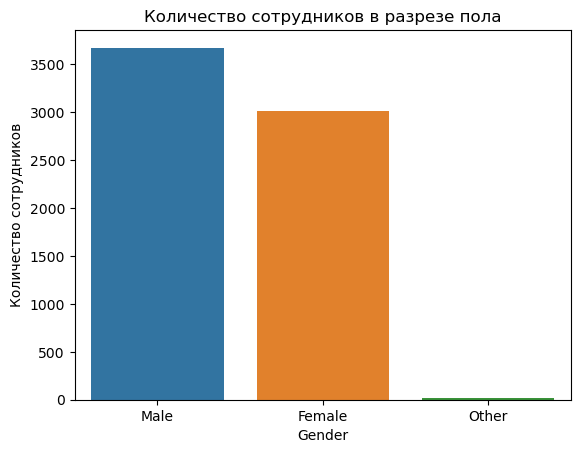

In [28]:
sns.countplot(data=df_2, x="Gender")
plt.title("Количество сотрудников в разрезе пола")
plt.ylabel("Количество сотрудников")
plt.show()

В представленной компании почти 55% сотрудников мужчины, почти 45% женщины, и что интересно 0.2% небинарные личности, которые по какой-то причине не относят себя ни к какой категории. Это будет наш 1 вопрос.

In [29]:
df_2["Education Level"].value_counts(normalize=True)

Bachelor's Degree    0.451045
Master's Degree      0.277761
PhD                  0.204328
High School          0.066866
Name: Education Level, dtype: float64

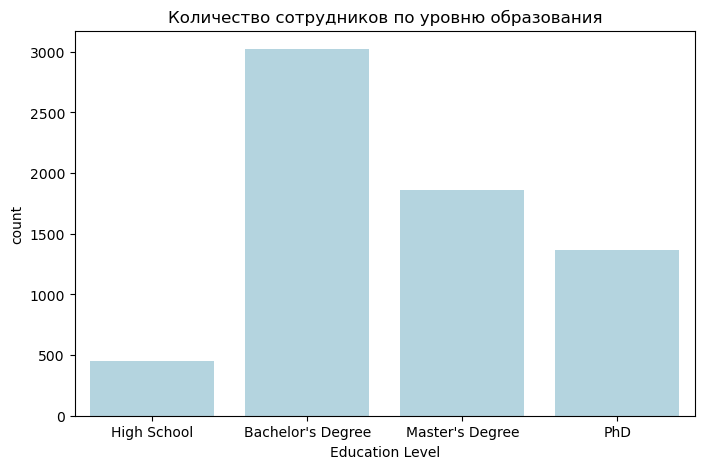

In [30]:
plt.figure(figsize=[8,5])
sns.countplot(data=df_2, x="Education Level", order=["High School", "Bachelor's Degree", "Master's Degree", "PhD"], color="lightblue")
plt.title("Количество сотрудников по уровню образования")
plt.show()

Без высшего образования всего 6,7% сотрудников, 45,1% сотрудников имеют степень бакалавра, 27,8% имеют степень магистра, и 20,4% имеют докторскую степень.

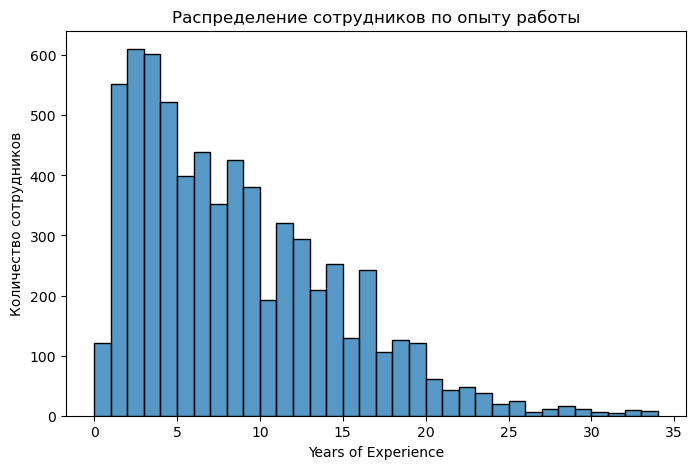

In [31]:
plt.figure(figsize=[8,5])
sns.histplot(data=df_2, x="Years of Experience", bins=34)
plt.title("Распределение сотрудников по опыту работы")
plt.ylabel("Количество сотрудников")
plt.show()

В организации сотрудники по опыту имеют нормальное распределение, и вполне коррелирует с возрастом,  мало сотрудников с опытом до года, а также больще 20 лет. максимальное количество сотрудников с опытом в диапазоне 1-15 лет

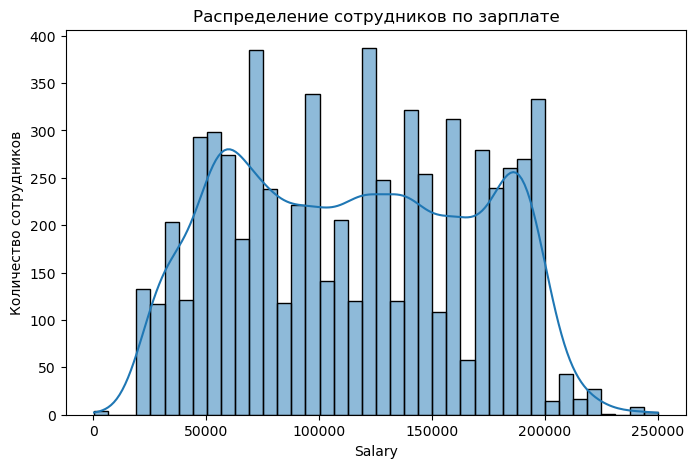

In [32]:
plt.figure(figsize=[8,5])
sns.histplot(data=df_2, x="Salary", bins=40, kde=True)
plt.title("Распределение сотрудников по зарплате")
plt.ylabel("Количество сотрудников")
plt.show()

Распределение в зарплате нормлаьное, есть несколько очень маленьких и больших значений.
Зарплата будет дополнительно проанализированы в связи с другими данными   

In [33]:
df_2["Country"].value_counts(normalize=True)

USA          0.202836
China        0.200448
Australia    0.199403
UK           0.199254
Canada       0.198060
Name: Country, dtype: float64

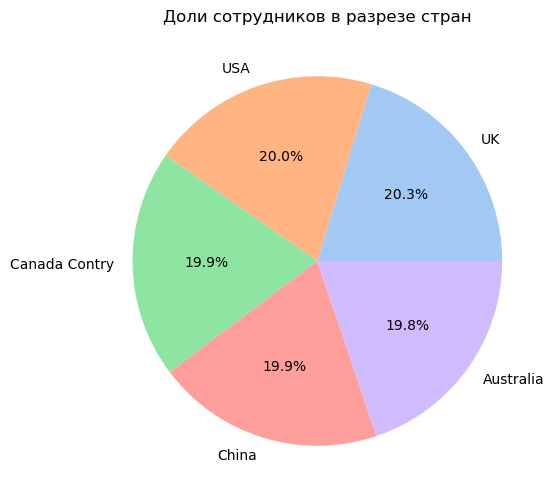

In [34]:
plt.figure(figsize=[6, 6])

data = df_2["Country"].value_counts(normalize=True)

labels = ["UK", "USA", "Canada Contry", "China", "Australia"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.1f%%')
plt.title("Доли сотрудников в разрезе стран")
plt.show()

представлено почти одинаковое количество (`20%) сотрудников по 5 странам.

In [35]:
df_2["Race"].value_counts(normalize=True)

White               0.293134
Asian               0.239254
Korean              0.068209
Australian          0.067463
Chinese             0.066269
Black               0.065224
African American    0.052836
Mixed               0.049851
Welsh               0.049701
Hispanic            0.048060
Name: Race, dtype: float64

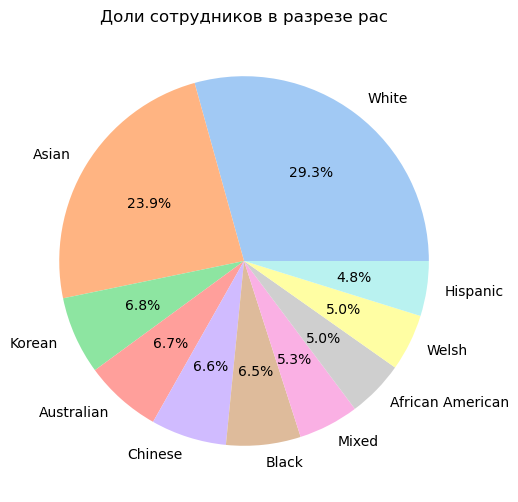

In [36]:
plt.figure(figsize=[6, 6])

data = df_2["Race"].value_counts(normalize=True)

labels = ["White", "Asian", "Korean", "Australian", "Chinese", "Black", "Mixed", "African American", "Welsh", "Hispanic"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.1f%%')
plt.title("Доли сотрудников в разрезе рас")
plt.show()

# Базовые статистики

In [38]:
# Функция для нахождения базовых статистических данных
def stat_base(frame_col):
  min_ = frame_col.min()
  max_ = frame_col.max()
  range_ = (max_ - min_).round(1)
  disp = frame_col.var().round(1).astype(int)
  stdev = frame_col.std().round(1)
  mean = frame_col.mean().round(1)
  median = frame_col.median()
  mode = frame_col.mode()[0]
  q1 = frame_col.quantile(0.25)
  q3 = frame_col.quantile(0.75)
  iqr = (q3 - q1).round(1)
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outliers = [x for x in frame_col if (x < lower_bound or x > upper_bound)]
  print(f" Минимум: {min_} \n Максимум:  {max_} \n Размах: {range_} \n Дисперсия: {disp} \n СКО: {stdev} \n Среднее арифметическое: {mean} \n Медиана:  {median} \n Мода: {mode} \n q1 {q1} q3 {q3} Межквартильный размах: {iqr}\n Нижняя граница:{lower_bound}\n Верхняя граница:{upper_bound}\n Выбросы: {outliers} \n")
  return

базовые статистики можем рассчитать для 3 числовых столбцов: возраст, опыт и зарплата

In [39]:
stat_base(df_2['Age'])

AttributeError: 'float' object has no attribute 'round'

Сотрудники в компании находятся в возрасте от 21 до 62 лет. Среднее значение 33,6 лет, а чаще встречаемое 27. В выбросы попали все сотрудники старше 53 лет и их много.

In [ ]:
stat_base(df_2['Years of Experience'])

Опыт сотрудников от 0 до 34 лет. Среднее значение 8,1 год, а чаще встречаемое 7. В выбросы попали все сотрудники с опытом свыше 25,5 лет и их тоже много.

In [ ]:
stat_base(df_2['Salary'])

Зарплата у сотрудников от 350 до 250 000, среднее значение почти совпало с медианой 115 000. Выбросов нет.  

# Выбросы в данных

Больше всего выбросов у нас в возрасте, рассмотрим разные категории, чтобы построить гипотезы причин этих выбросов

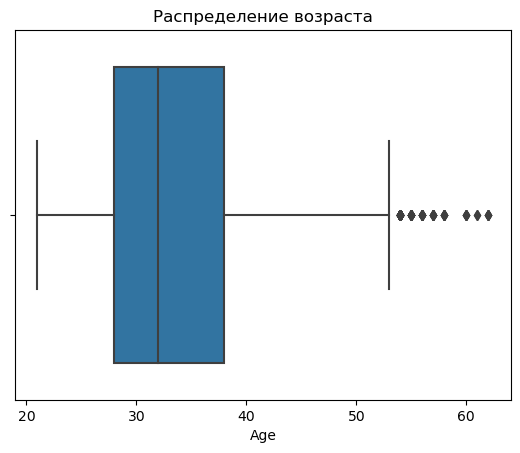

In [40]:
sns.boxplot(data=df_2, x='Age')
plt.title("Распределение возраста")
plt.show()

50% сотрудников находятся в возрасте от 28 до 38 лет. Сотрудники старше 53 лет попали в выбросы. При устройстве на работу часто ограничивают предельный возраст кандидата в районе 35-40 лет, особенно у женщин. Рассмотрим подробнее.

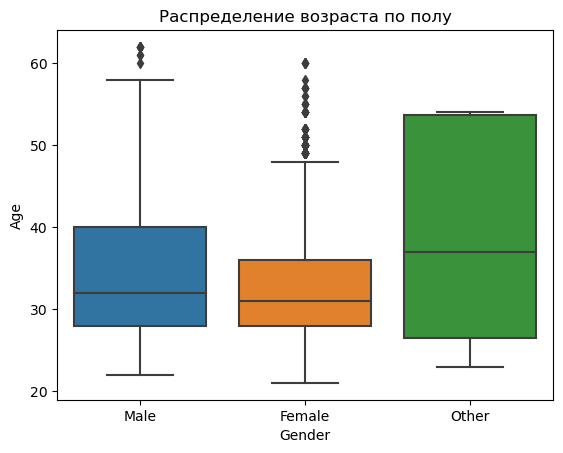

In [41]:
sns.boxplot(data=df_2, x='Gender', y='Age')
plt.title("Распределение возраста по полу")
plt.show()

50 % сотрудников мужчин в возрасте от 28 до 40 лет, по женщинам возраст ниже от 28 до 36 лет. Зачастую женщинам в 40-45 лет очень трудно уже найти новую работу.

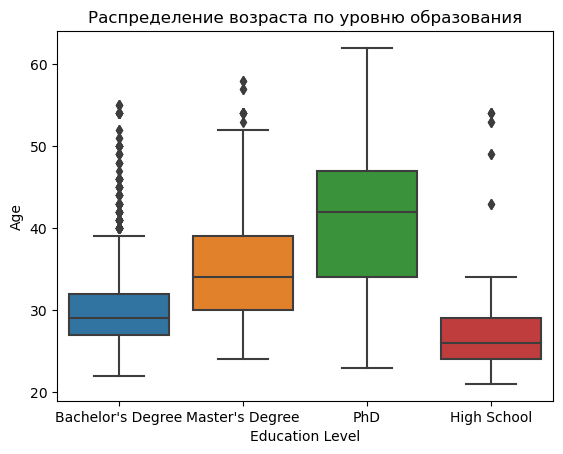

In [42]:
sns.boxplot(data=df_2, x='Education Level', y='Age')
plt.title("Распределение возраста по уровню образования")
plt.show()

Уровень образования соотвествует ожиданиям, самый маленький размах у среднего образования 24-28 лет, дальше идет бакалавр  - 27-32 года, магистратура - 30-39 лет и докторская степень - 33-47 лет.

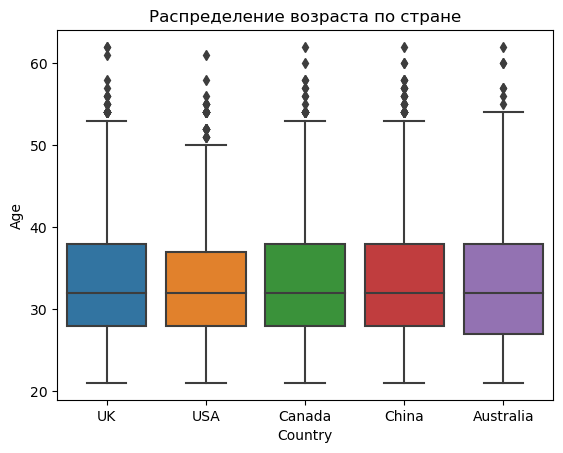

In [43]:
sns.boxplot(data=df_2, x='Country', y='Age')
plt.title("Распределение возраста по стране")
plt.show()

по странам возраст 50 % сотрудников примерно одинаковый 28-38 лет, немного отличается верхняя граница в США - 37 лет и нижняя в Австралии 27 лет. Выбросы также есть во всех странах.

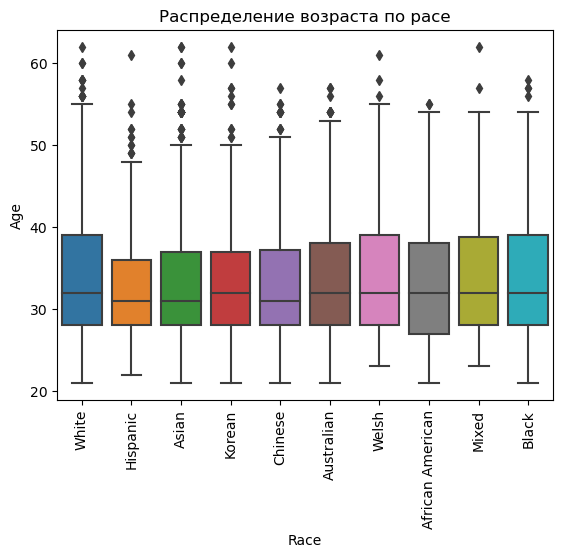

In [44]:
ax = sns.boxplot(data=df_2, x='Race', y='Age')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Распределение возраста по расе")
plt.show()

Самая низкая верхняя граница 50% сотрудников у латиноамериканцев - 36 лет примерно, у азиатов и корейцев - 37 лет, нижняя граница у всех 28, кроме афро американцев у их 27 лет.

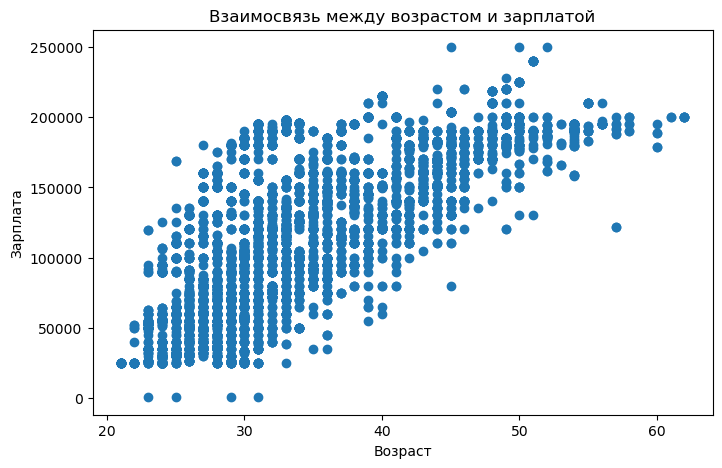

In [45]:
plt.figure(figsize=[8,5])
plt.scatter(data=df_2, x="Age", y="Salary")
plt.title("Взаимосвязь между возрастом и зарплатой")
plt.ylabel("Зарплата")
plt.xlabel("Возраст")
plt.show()

Чем выше возраст, тем выше зарплата, но тут скорее всего зависимость не от возраста больше, а от опыта работы, который коррелирует с возрастом. Есть небольшие выбросы с низкой зарплатой и средней зарплатой в почтительном возрасте 50-60 лет.


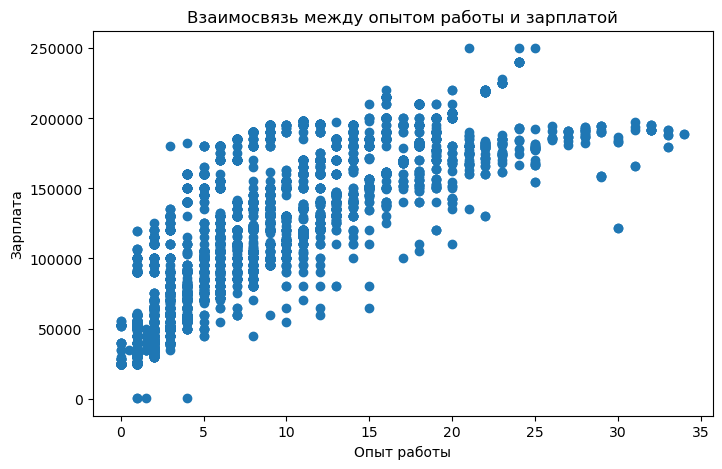

In [46]:
plt.figure(figsize=[8,5])
plt.scatter(data=df_2, x="Years of Experience", y="Salary")
plt.title("Взаимосвязь между опытом работы и зарплатой")
plt.ylabel("Зарплата")
plt.xlabel("Опыт работы")
plt.show()

Чем больше опыт работы, тем выше зарплата. Корреляция визуально выше. Есть небольшие выбросы с низкой зарплатой с ненулевым опытом работы и средней зарплатой с опытом 30 лет.

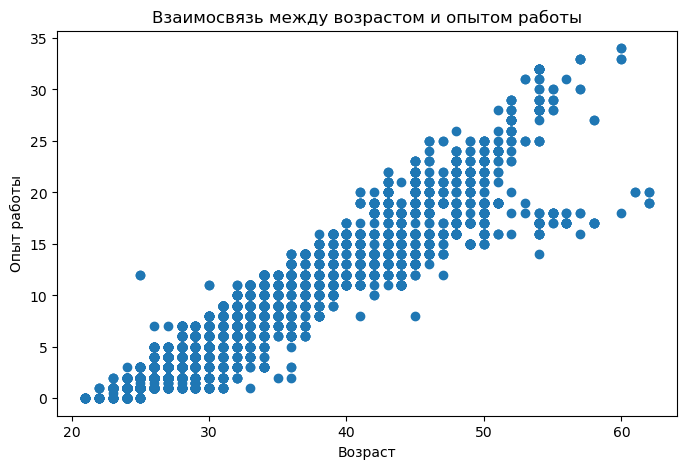

In [47]:
plt.figure(figsize=[8,5])
plt.scatter(data=df_2, x="Age", y="Years of Experience")
plt.title("Взаимосвязь между возрастом и опытом работы")
plt.ylabel("Опыт работы")
plt.xlabel("Возраст")
plt.show()

До 50 лет линейная зависимость между возрастом и опытом работы, чем больше возраст, тем больше опыт, то есть сразу после получения образования сотрудник продолжает нарабатывать опыт в данной сфере.
После 50 лет есть разброс в данных, то есть предполагаю, что люди получали вторую профессию, например


Общий вывод по оценке возраста сотрудников примерно одинаково распределены по странам и расе, по полу есть разница: женщины имеют меньший межквартильный размах в возрасте. Образование имеет больший разброс в данных. Для каждой ступеньки нужно время, поэтому конечно людис с докторской степенью старше людей со средним образованием. При этом возраст растет паралелльно опыту работы сотрудников, также как и зарплата, что говорит о том, что выбранная сфера деятельности нравится сотрудником и предполагаю, что люди до пенсии готовы на нее работать, что и показывают выбросы в большую сторону. При этом минимальный возраст 21 год - хороший возраст для начала в профессии и наработки опыта.

Предположительно выбросы по опыту работу определены возрастом. Мы уже убедились, что даные коррелируют между собой. Рассмотрим и другие зависимости.


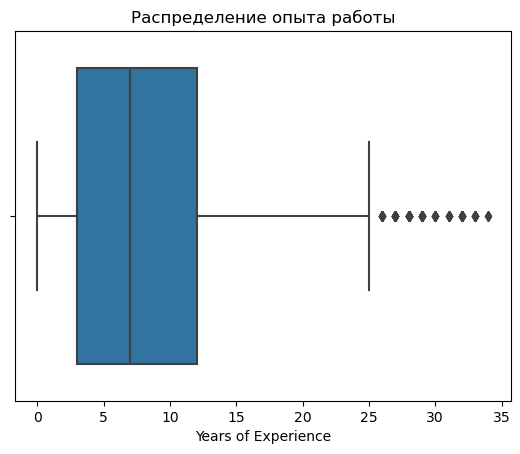

In [48]:
sns.boxplot(data=df_2, x='Years of Experience')
plt.title("Распределение опыта работы")
plt.show()

выбросы фиксируются после опыта в 25 лет

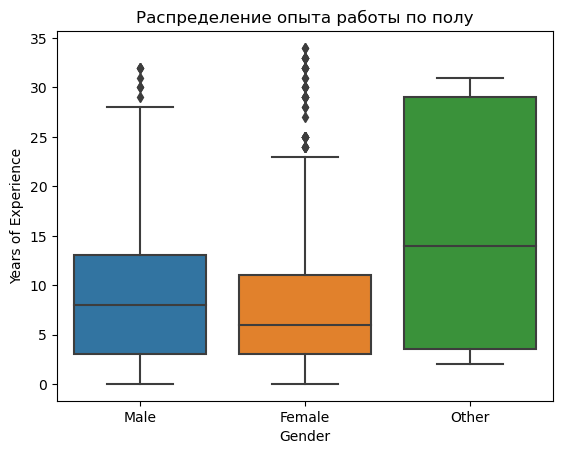

In [49]:
sns.boxplot(data=df_2, x='Gender', y='Years of Experience')
plt.title("Распределение опыта работы по полу")
plt.show()

Среди женщин выбросов больше, чем среди мужчин. 50% сотрудников мужчин имеют опыт 3,5-13,5 лет, а среди женщин 3,5-12 лет. Но и максимальный опыт работы также у женщин. Разберем подробнее во 2 вопросе.

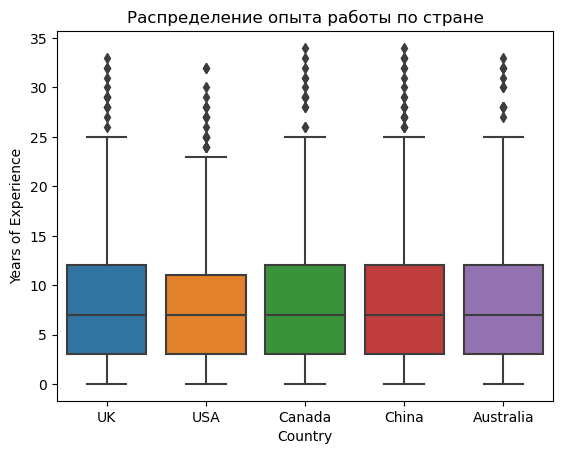

In [50]:
sns.boxplot(data=df_2, x='Country', y='Years of Experience')
plt.title("Распределение опыта работы по стране")
plt.show()

данные примерно соотвестствуют данным о возрасте. по странам опыт работы 50 % сотрудников примерно одинаковый 4-12 лет. выбросы есть во всех странах.

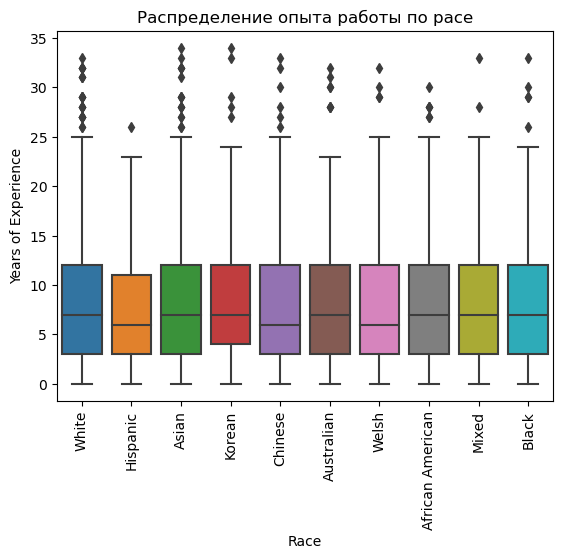

In [51]:
ax = sns.boxplot(data=df_2, x='Race', y='Years of Experience')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Распределение опыта работы по расе")
plt.show()

В среднем 50% сотрудников всех рас имею опыт работы 3-12 лет

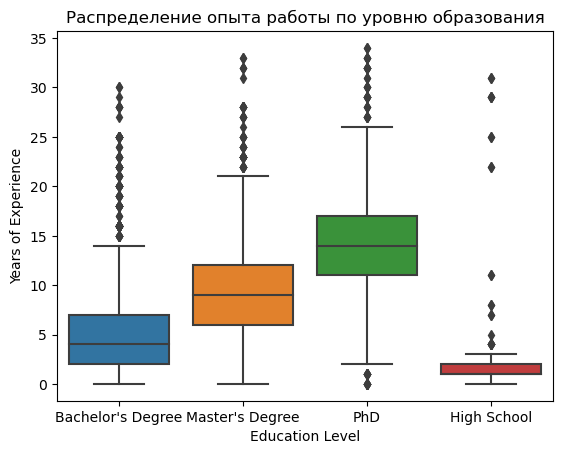

In [52]:
sns.boxplot(data=df_2, x='Education Level', y='Years of Experience')
plt.title("Распределение опыта работы по уровню образования")
plt.show()

у 50% сотрудников со средним образованием опыт меньше всех групп: 1-2 года, все значения больше примерно 3 лет считаются выбросом в данной выборке. А вот для доктора наук наоборот выбросами считается опыт работы до 2 лет в данной сфере, ну или больше 26 лет, что в принципе соотвествует общей выборке по группе. У бакалавриата опыт работы 3-7 лет, а у магистатуры - 6-13.


Общий вывод по оценке опыта работы сотрудников примерно одинаково распределены по странам и расе, по полу есть разница: женщины имеют меньший межквартильный размах в опыте, но имеют больше выбросов. Образование имеет больший разброс в данных. С опытом работы сотрудники получает больше знаний и хотят развиваться в данной сфере и получать дополнительное образование. Но и есть сотрудники которые имея достаточный опыт, не стремятся получать образование, кроме имеющего среднего. С опытом работы сотрудников, растет и зарплата, также выбросы свыше 25 лет говорят о том, что сотрудником есть интерес долго работать в сфере, повышая свой профессионализм и зарплату. Новички также приходят на работу в компанию.

# Вопросы

# 1. Что за третий гендерный тип? Кто эти люди?

In [53]:
df_other = df_2[df_2['Gender'] == 'Other']
df_other

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0,Canada,White
2385,25.0,Other,High School,Full Stack Engineer,2.0,69032.0,UK,Asian
2406,37.0,Other,Master's Degree,Full Stack Engineer,14.0,161393.0,UK,Asian
2448,31.0,Other,High School,Back end Developer,8.0,104127.0,Australia,White
2454,23.0,Other,High School,Front end Developer,2.0,62852.0,China,White
2458,53.0,Other,High School,Senior Project Engineer,31.0,166109.0,China,White
2465,25.0,Other,High School,Full Stack Engineer,2.0,69032.0,USA,African American
2486,37.0,Other,Master's Degree,Full Stack Engineer,14.0,161393.0,USA,Asian
2528,31.0,Other,High School,Back end Developer,8.0,104127.0,USA,African American
2534,23.0,Other,High School,Front end Developer,2.0,62852.0,China,Chinese


14 человек маленькая выборка, но можно отметить следующее


In [54]:
df_other.describe()

,Age,Years of Experience,Salary
count,14.000000,14.000000,14.000000
mean,39.571429,16.428571,125869.857143
std,13.380320,12.537417,44242.382776
min,23.000000,2.000000,62852.000000
25%,26.500000,3.500000,77805.750000
50%,37.000000,14.000000,158610.000000
75%,53.750000,29.000000,160786.250000
max,54.000000,31.000000,166109.000000


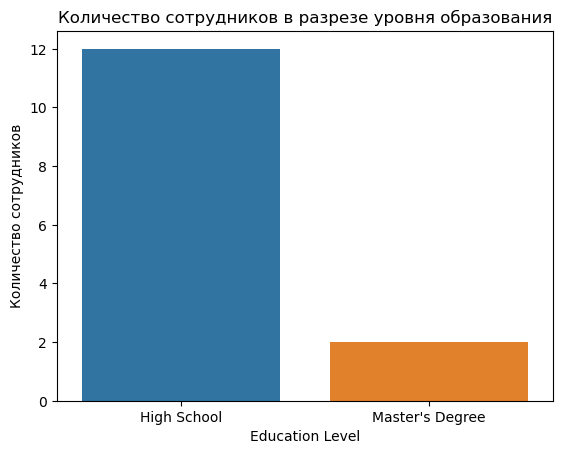

In [55]:
sns.countplot(data=df_other, x="Education Level")
plt.title("Количество сотрудников в разрезе уровня образования")
plt.ylabel("Количество сотрудников")
plt.show()

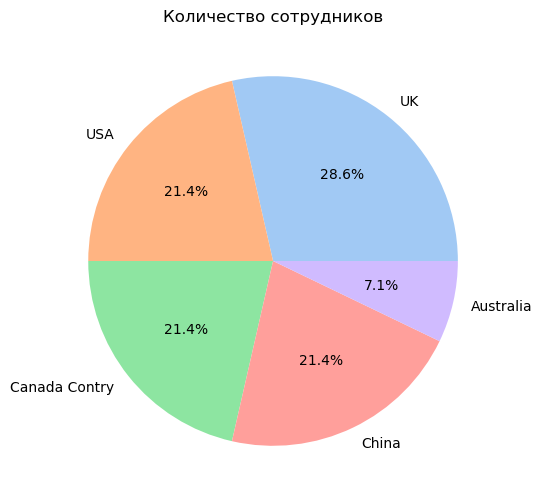

In [74]:
plt.figure(figsize=[6, 6])

data = df_other["Country"].value_counts(normalize=True)

labels = ["UK", "USA", "Canada Contry", "China", "Australia"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.1f%%')
plt.title("Доли сотрудников в разрезе стран")
plt.show()

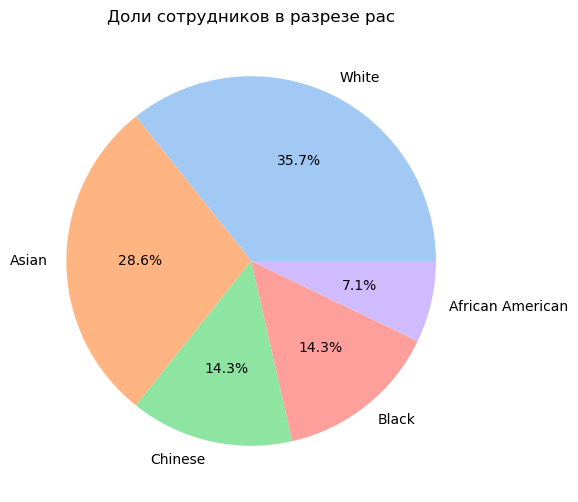

In [57]:
plt.figure(figsize=[6, 6])

data = df_other["Race"].value_counts(normalize=True)

labels = ["White", "Asian", "Chinese", "Black", "African American"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.1f%%')
plt.title("Доли сотрудников в разрезе рас")
plt.show()

Нет корейцев, австралийцев, валлийцев и латиноамериканцев

Со своим полом не определилось всего 14 человек в возрасте от 23 до 54 лет и опытом работы от 2 до 31 года, почти все со средним образованием, по расе чаще это белые и азиаты, представители в основном 4 стран, всего 1 человек из Австралии. И предяя зарплата этого типа почти 126 000, что выше средней по всей выборке.

# 2 Действительно ли больше всего опыта у женщин, сколько таких сотрудников?

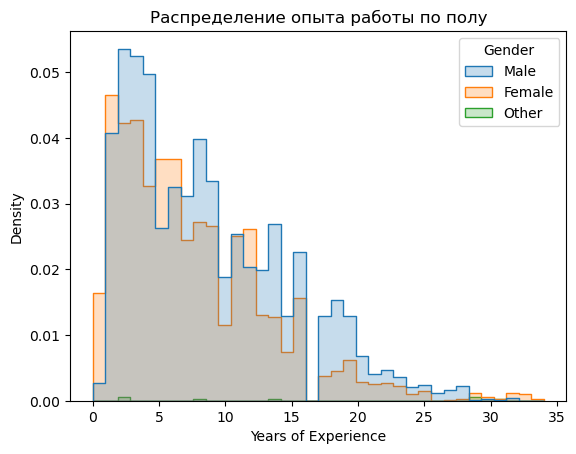

In [58]:
sns.histplot(df_2, x="Years of Experience", hue="Gender", element="step", stat="density")
plt.title("Распределение опыта работы по полу")
plt.show()

In [59]:
df_YE = df_2[df_2['Years of Experience'] >= 30]
df_YE["Gender"].value_counts()

Female    21
Male       6
Other      2
Name: Gender, dtype: int64

In [60]:
Больше 72% из 29 человек, которые имеют опыт 30 и более лет, это женщины.

SyntaxError: invalid syntax (1862103578.py, line 1)

# 3 Правда ли что женщинам в данной сфере платят меньше, чем мужчинам?

---



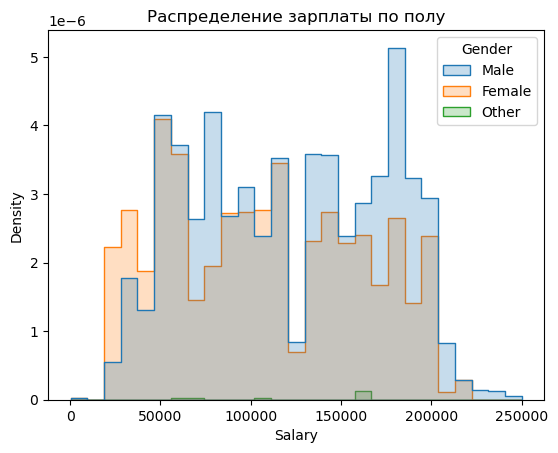

In [61]:
sns.histplot(df_2, x="Salary", hue="Gender", element="step", stat="density")
plt.title("Распределение зарплаты по полу")
plt.show()

Действительно женщин с зарплатой меньше 50 000 больше, чем мужчин, а вот зарплата от 130 000 чаще встречается у мужчин, нежели у женщин

# 4 Есть ли зависимость на одной должности (самой многочисленной в нашей выборке) по средней зарплате от пола, страны, расы и образования

In [62]:
df_2["Job Title"].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [63]:
df_SE = df_[df_['Job Title'] == 'Software Engineer']
df_SE

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,UK,White
376,28.0,Female,Bachelor's Degree,Software Engineer,3.0,125000.0,Canada,Black
380,29.0,Female,Bachelor's Degree,Software Engineer,4.0,140000.0,Australia,White
384,31.0,Female,Bachelor's Degree,Software Engineer,6.0,155000.0,UK,Welsh
388,29.0,Female,Bachelor's Degree,Software Engineer,4.0,140000.0,USA,Hispanic
...,...,...,...,...,...,...,...,...
6191,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0,USA,Asian
6205,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0,China,Korean
6219,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0,Australia,White
6233,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0,Australia,Asian


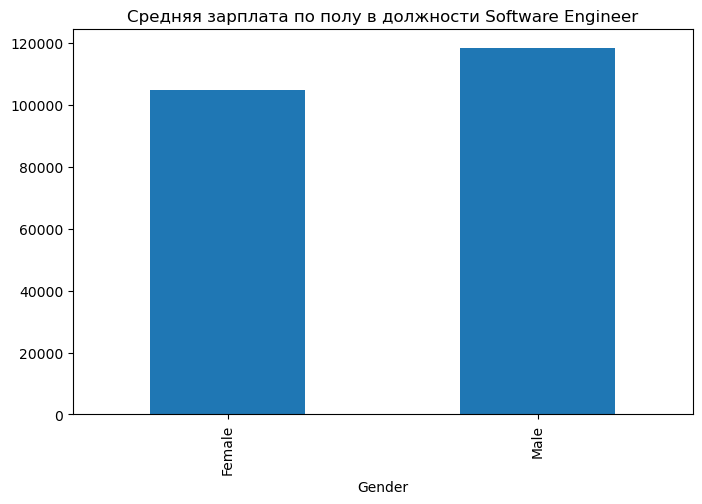

In [64]:
plt.figure(figsize=[8,5])
df_SE.groupby('Gender')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата по полу в должности Software Engineer")
plt.show()

Разница между зарплатой мужчины и женщины на одно должности порядка 15000

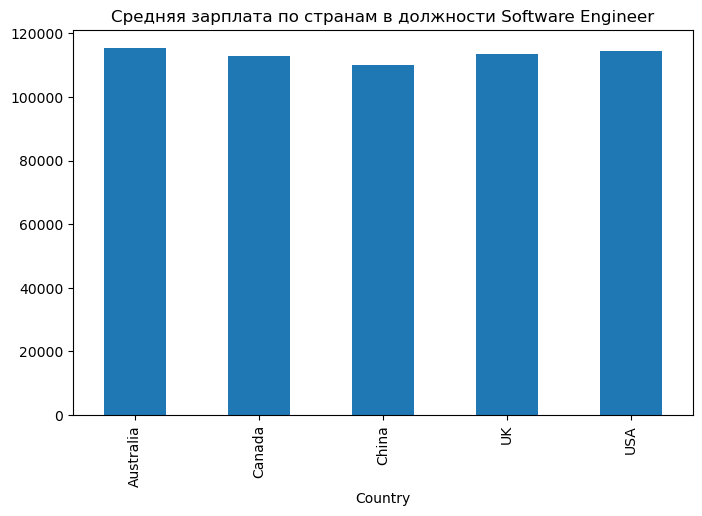

In [65]:
plt.figure(figsize=[8,5])
df_SE.groupby('Country')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата по странам в должности Software Engineer")
plt.show()


По странам расхожднение в средней зарплате небольшое, порядка 5000

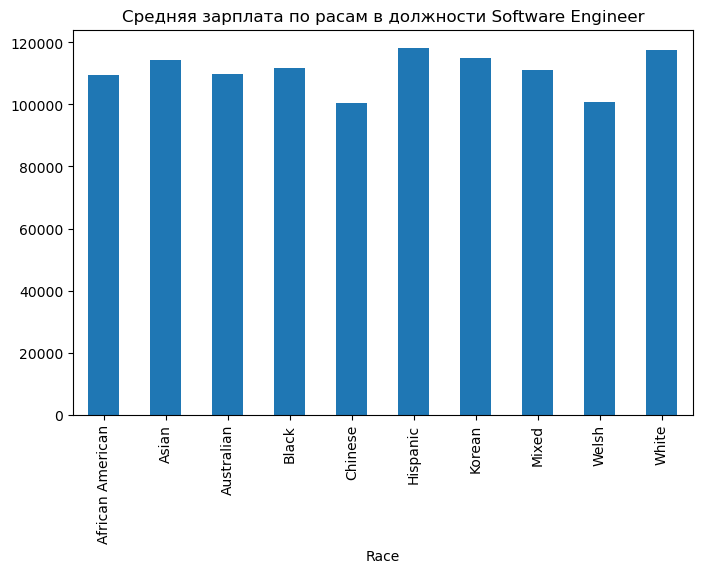

In [66]:
plt.figure(figsize=[8,5])
df_SE.groupby('Race')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата по расам в должности Software Engineer")
plt.show()

Самая низкая средняя зарплата у Валлийцев и Китайцев

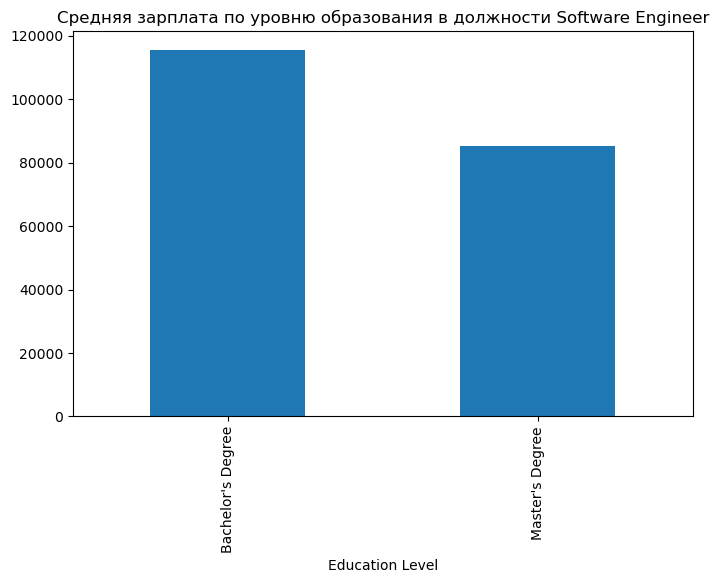

In [67]:
plt.figure(figsize=[8,5])
df_SE.groupby('Education Level')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата по уровню образования в должности Software Engineer")
plt.show()

Вывод о том, что если сотрудник закончил магистртуру, то у него будет ниже зарплата, скорее всего неверный, проведем доп анализ.

In [68]:
df_SE["Education Level"].value_counts()

Bachelor's Degree    478
Master's Degree       40
Name: Education Level, dtype: int64

количество бакалавров в выборке 92%, а магистров всего 8%, данные могут быть неправильно распределены

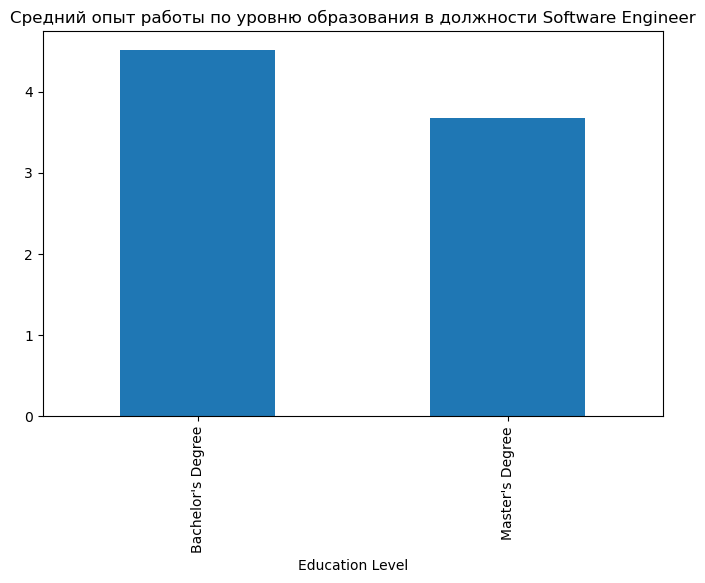

In [69]:
plt.figure(figsize=[8,5])
df_SE.groupby('Education Level')['Years of Experience'].mean().plot(kind="bar")
plt.title("Средний опыт работы по уровню образования в должности Software Engineer")
plt.show()

также что интересно средний опыт работы у магистров меньше, что противоречит тенденции общей выборки.

В рамках анализа должности Software Engineer можно сделать следующие выводы:
1. Мужчинам платят больше.
2. По стране и расе в целом среднняя зарплата не меняется.
3. От образования не зависит средняя, а вот от опыта работы зависит.

# 5 Есть ли зависимость между средней зарплатой и уровнем образования?

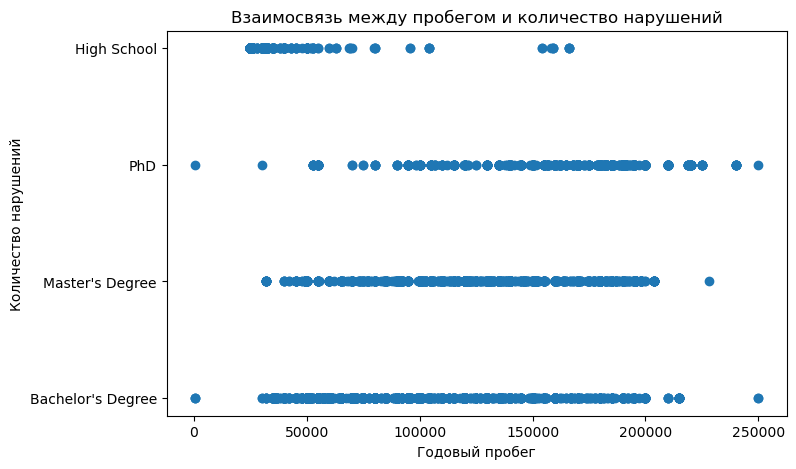

In [70]:
plt.figure(figsize=[8,5])
plt.scatter(data=df_2, x="Salary", y="Education Level")
plt.title("Взаимосвязь между пробегом и количество нарушений")
plt.ylabel("Количество нарушений")
plt.xlabel("Годовый пробег")
plt.show()

В целом можем говорить о том, что чем ниже уровень образования, тем выше зарплата, но также есть выбросы, намекающие, что возможно что-то еще играет роль, например, опыт работы.

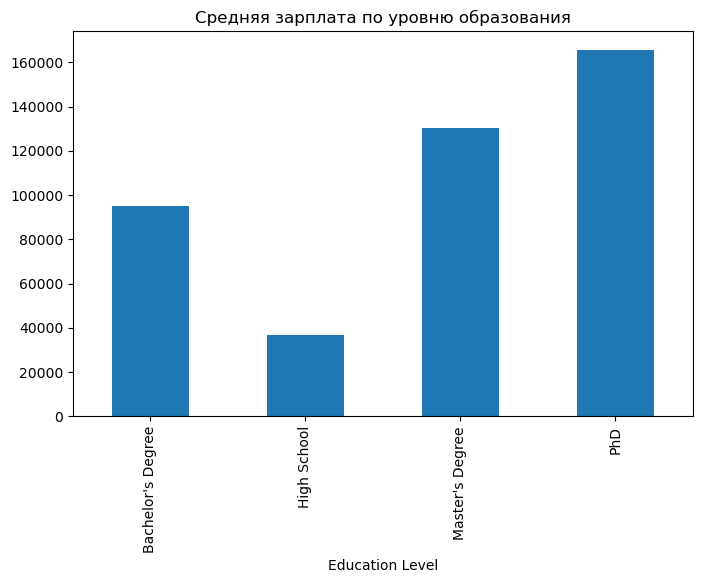

In [71]:
plt.figure(figsize=[8,5])
df_2.groupby('Education Level')['Salary'].mean().plot(kind="bar")
plt.title("Средняя зарплата по уровню образования")
plt.show()

Судя по диаграмме чем ниже уровень образования, тем ниже уровень зарплаты сотрудника, но мы также помним, что чем ниже уровень образования, тем и опыт сотрудничка чаще всего меньше. Проведем трехфакторный анализ

In [72]:
edu_income = pd.pivot_table(data=df_2, index='Education Level', columns='Years of Experience', values='Salary', aggfunc='mean')
edu_income

Years of Experience,0.0,0.5,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0,...,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0
Education Level,,,,,,,,,,,,,,,,,,,,,
Bachelor's Degree,42756.727273,35000.0,54069.792994,31918.75,61574.492958,74407.468951,85296.804878,103856.800000,96303.093333,112126.605096,...,179819.0,NaN,183417.0,192960.8,191915.000000,184670.5,NaN,NaN,NaN,NaN
High School,25845.090909,NaN,29902.572193,NaN,37698.762376,45850.305556,68813.500000,70000.000000,NaN,95845.000000,...,154207.0,NaN,NaN,NaN,158788.000000,NaN,166109.0,NaN,NaN,NaN
Master's Degree,55538.000000,NaN,68064.516129,45000.00,63265.205479,75895.292929,83214.412500,96727.918919,130908.188482,113776.757353,...,179662.5,184816.000000,188078.0,189076.5,NaN,NaN,193746.0,195270.000000,188232.0,NaN
PhD,52695.500000,NaN,87055.125000,NaN,115000.000000,NaN,55000.000000,117744.000000,104854.869565,170789.473684,...,181714.0,188200.833333,188668.4,186327.0,192882.428571,152674.5,194586.0,191371.142857,185485.0,188651.0


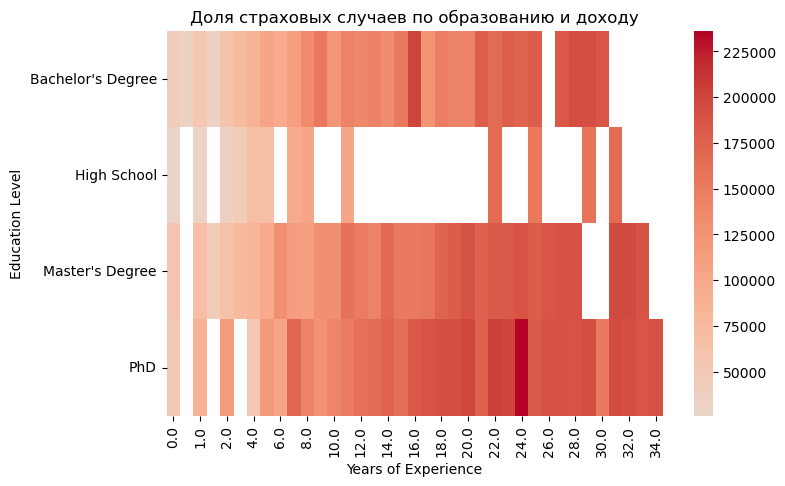

In [73]:
plt.figure(figsize=[8,5])
sns.heatmap(edu_income, annot=False, cmap='coolwarm',center=0.117)
plt.title("Доля страховых случаев по образованию и доходу")
plt.show()

Больше всего на зарплату все же влияет опыт работы, нежели образование